<Figure size 2000x600 with 0 Axes>

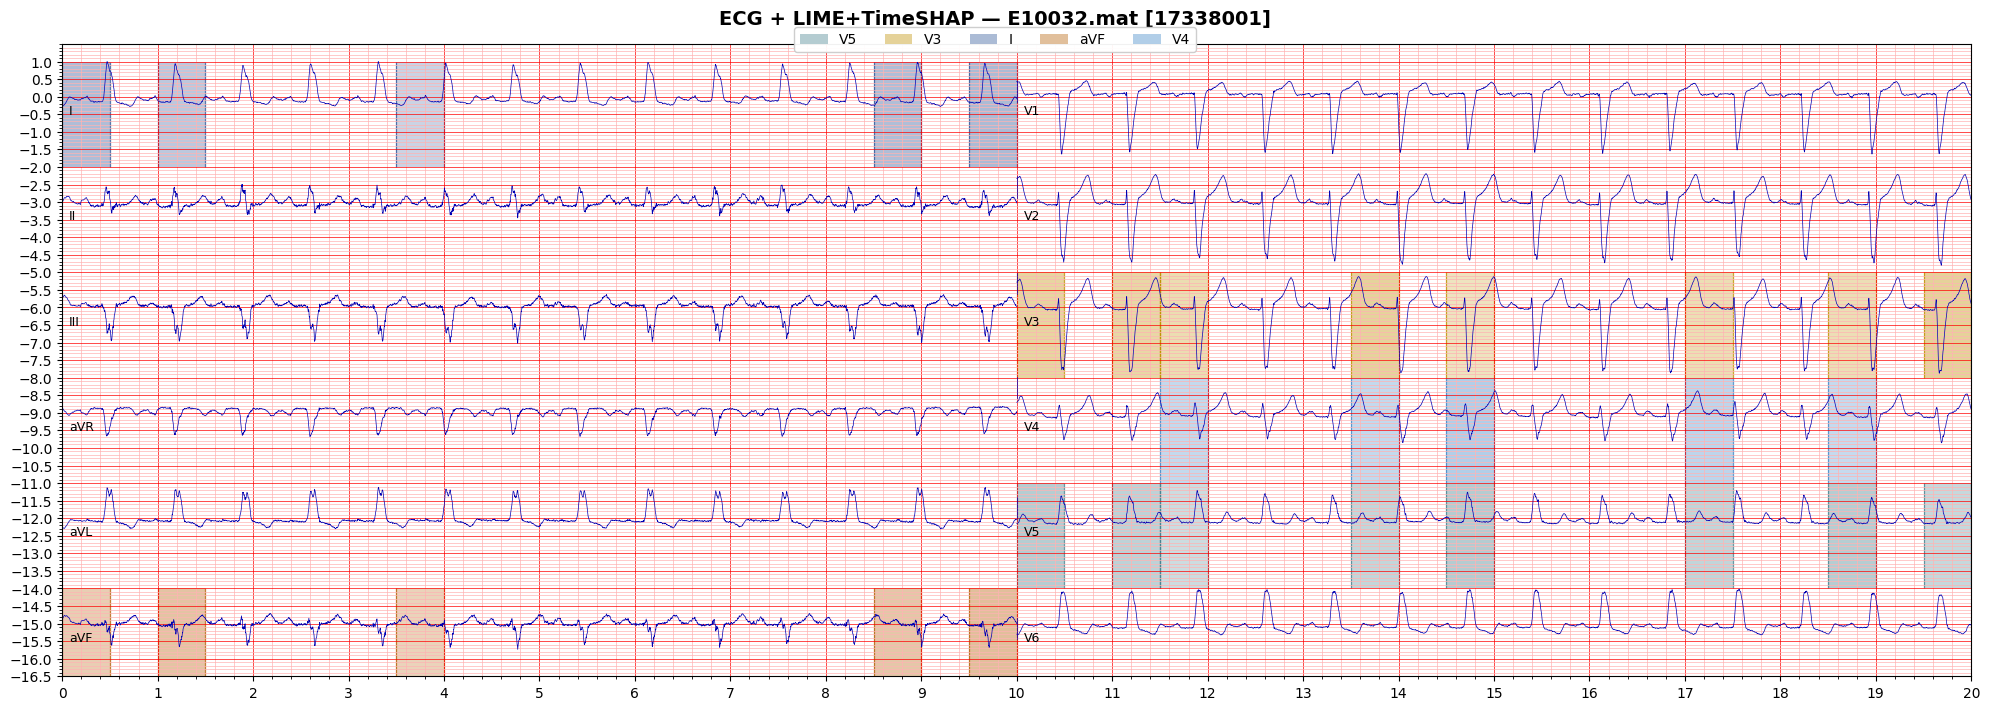

<Figure size 2000x600 with 0 Axes>

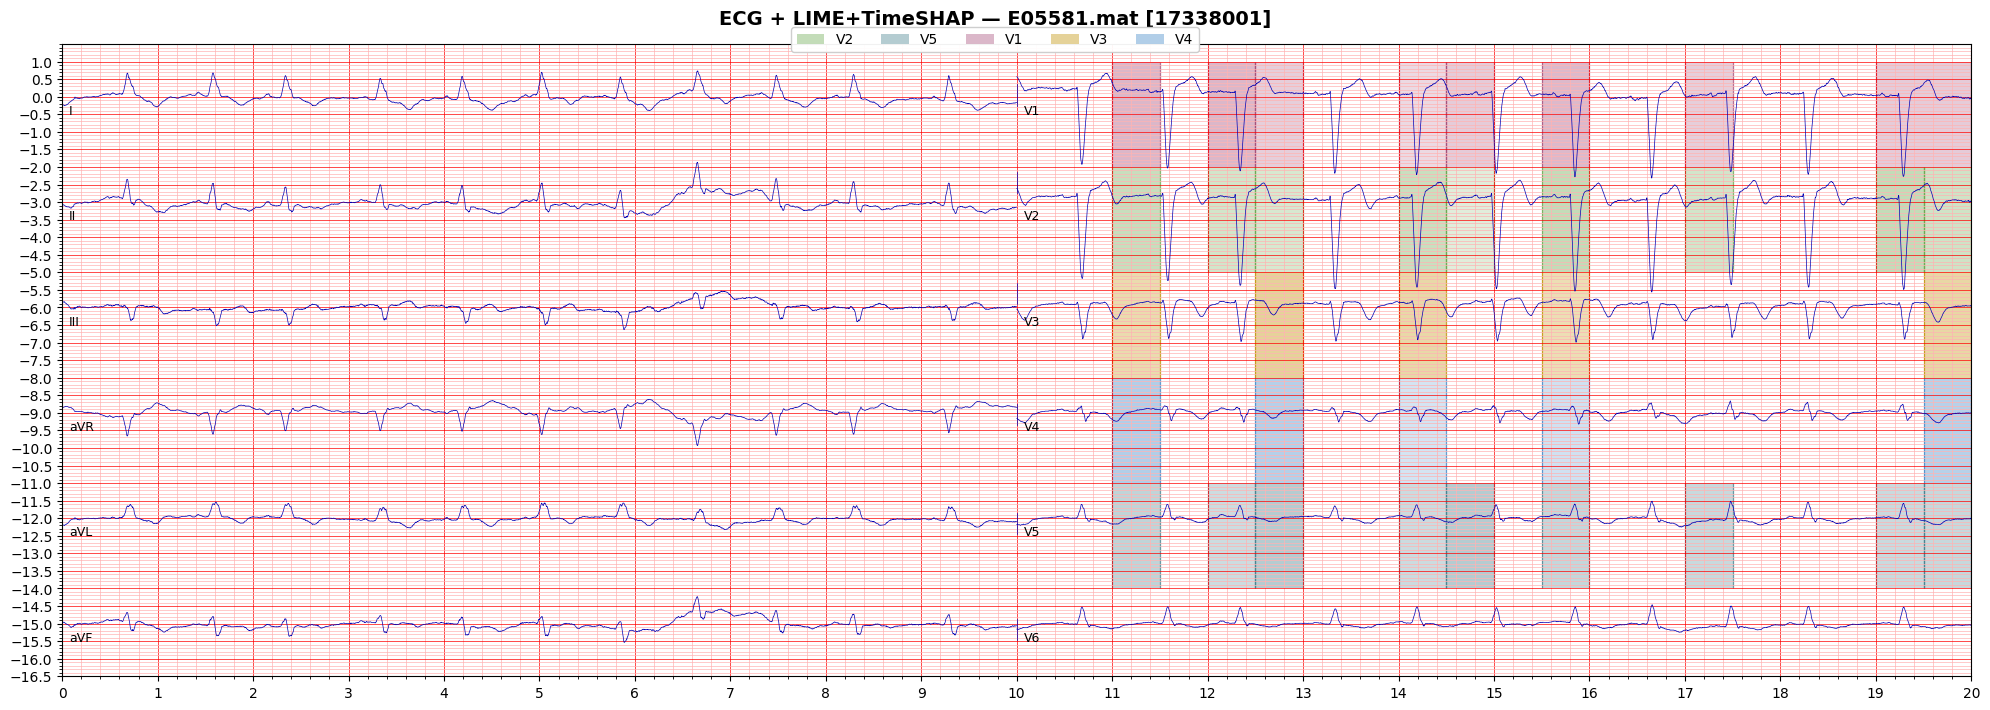

In [2]:
from pathlib import Path
import tensorflow as tf
import numpy as np
import pandas as pd

from run_explain import (
    run_fused_pipeline_for_classes,
    plot_from_payload,
)

ROOT = Path.cwd().parent

MODEL_PATH         = ROOT / "model" / "resnet_final.keras"
SNOMED_CLASSES_NPY = ROOT / "data" / "snomed_classes.npy"
SEL_DF_CSV         = ROOT / "data" / "ecg_model_pred_data.csv"

model = tf.keras.models.load_model(MODEL_PATH, compile=False)
class_names = np.load(SNOMED_CLASSES_NPY, allow_pickle=True)
sel_df = pd.read_csv(SEL_DF_CSV)


all_fused_payloads, df_lime_all, df_ts_all = run_fused_pipeline_for_classes(
    target_classes=["17338001"],  # e.g. SNOMED code or exact label in class_names
    sel_df=sel_df,
    model=model,
    class_names=class_names,
    max_examples_per_class=5,
    plot=True
)
